# Linear Regression –Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [2]:
dataset= pd.read_csv("Walmart_Store_sales.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
dataset.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
y = pd.get_dummies(dataset["Store"])
dataset = dataset.drop('Store',axis = 1)
dataset = dataset.join(y)

In [6]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scale_temp = scaler.fit_transform(dataset[['CPI']]) 
dataset['CPI'] = scale_temp
scale_fuel = scaler.fit_transform(dataset[['Fuel_Price']]) 
dataset['Fuel_Price'] = scale_fuel
scale_unemployment = scaler.fit_transform(dataset[['Unemployment']]) 
dataset['Unemployment'] = scale_unemployment

In [7]:
dataset.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,1,2,3,...,36,37,38,39,40,41,42,43,44,45
0,05-02-2010,1643690.90,0,42.31,-1.713800,1.004175,0.056964,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12-02-2010,1641957.44,1,38.51,-1.766089,1.007880,0.056964,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19-02-2010,1611968.17,0,39.93,-1.840166,1.009074,0.056964,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26-02-2010,1409727.59,0,46.63,-1.737766,1.009849,0.056964,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,05-03-2010,1554806.68,0,46.50,-1.598328,1.010624,0.056964,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x=dataset.drop(columns=['Weekly_Sales','Date'],axis=1)
y=dataset['Weekly_Sales']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.75,random_state=1)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4826, 50)
(1609, 50)
(4826,)
(1609,)


In [11]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [12]:
r2=r2_score(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)

In [13]:
print((r2*100))

91.9173573616971


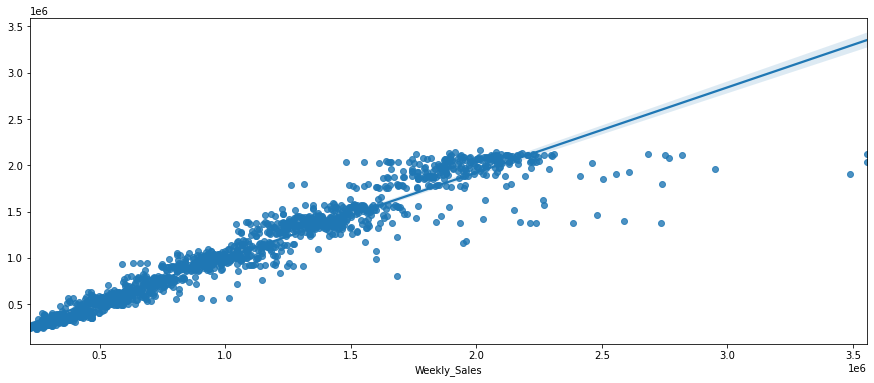

In [14]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_predict) 
plt.show()